This is complete analysis of the issues colected from SonarQube, on top of the 9 open source C# repos

In [21]:
import json
import pandas as pd

In [22]:
def load_project_names():
    file_path = 'sonar-issues-miner/resources/java_project_list.json'
    with open(file_path) as f:
        projects_json = json.load(f)
        return list(pd.json_normalize(projects_json)['projectName'])

project_names = load_project_names()

In [23]:
project_names

['Akka.net',
 'CrispyWaffle',
 'DnnPlatform',
 'Duality',
 'MaterialDesignToolkit.Full',
 'NLog',
 'Nunit',
 'Orleans',
 'ResXResourceManager']

In [24]:
def get_project_issues(project_name):
    file_path = f'sonar-issues-miner/resources/open-issues/{project_name}_issues.json'
    
    with open(file_path) as f:
        d = json.load(f)[0]
        print(f"{file_path} has {d['total']} issues")
        return d['issues']

nlog = get_project_issues('NLog')

sonar-issues-miner/resources/open-issues/NLog_issues.json has 299 issues


In [25]:
def load_issues_per_project():
    issues_per_project = {}
    for project in project_names:
        if project != 'MaterialDesignToolkit.Full':
            issues_per_project[project] = pd.json_normalize(get_project_issues(project))
    return issues_per_project

issues_per_project = load_issues_per_project()

sonar-issues-miner/resources/open-issues/Akka.net_issues.json has 3248 issues
sonar-issues-miner/resources/open-issues/CrispyWaffle_issues.json has 179 issues
sonar-issues-miner/resources/open-issues/DnnPlatform_issues.json has 474 issues
sonar-issues-miner/resources/open-issues/Duality_issues.json has 2457 issues
sonar-issues-miner/resources/open-issues/NLog_issues.json has 299 issues
sonar-issues-miner/resources/open-issues/Nunit_issues.json has 2885 issues
sonar-issues-miner/resources/open-issues/Orleans_issues.json has 6461 issues
sonar-issues-miner/resources/open-issues/ResXResourceManager_issues.json has 172 issues


In [26]:
issues_per_project.items()

dict_items([('Akka.net',                        key                    rule severity  \
0     AZPCy9S4gGHOmLlmW5XG  external_roslyn:CA1822     INFO   
1     AZPCy9LJgGHOmLlmW5Rb  external_roslyn:CA2211     INFO   
2     AZPCy9LJgGHOmLlmW5Rc  external_roslyn:CA2211     INFO   
3     AZPCy9LJgGHOmLlmW5Ra  external_roslyn:CS1998    MAJOR   
4     AZPCy8hugGHOmLlmW49c       csharpsquid:S3626    MINOR   
...                    ...                     ...      ...   
3243  AZPCy8UDgGHOmLlmW40f       csharpsquid:S4035    MAJOR   
3244  AZPCy8UDgGHOmLlmW40g       csharpsquid:S4035    MAJOR   
3245  AZPCy8K3gGHOmLlmW4wU       csharpsquid:S4136    MINOR   
3246  AZPCy9WfgGHOmLlmW5YG       csharpsquid:S1118    MAJOR   
3247  AZPCy9WcgGHOmLlmW5YF       csharpsquid:S1118    MAJOR   

                                              component   project   line  \
0     Akka.net:contrib/dependencyinjection/Akka.Depe...  Akka.net   57.0   
1     Akka.net:contrib/cluster/Akka.Cluster.Sharding...  Akka.net 

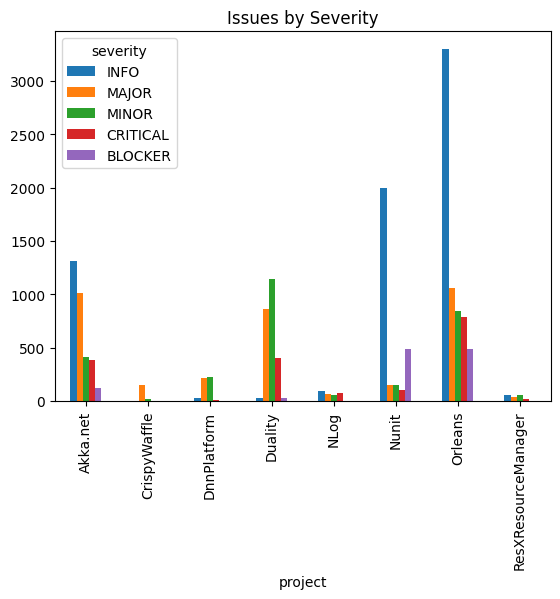

In [27]:
def get_issue_property(issues_per_project, property):
    severity = []
    for project, issues in issues_per_project.items():
        #print(project, issues.columns)
        if property in issues:
            issues_severity = issues[property].value_counts()
            df_val_counts = pd.DataFrame(issues_severity).T
            df_val_counts['project'] = project
            df_val_counts.set_index('project', inplace=True)
            severity.append(df_val_counts)
    return pd.concat(severity)


get_issue_property(issues_per_project, 'severity').plot.bar(title="Issues by Severity")
import matplotlib.pyplot as plt
plt.savefig('severity_plot.png')

In [28]:
get_issue_property(issues_per_project, 'severity').to_csv('issues_by_severity.csv', sep='|')

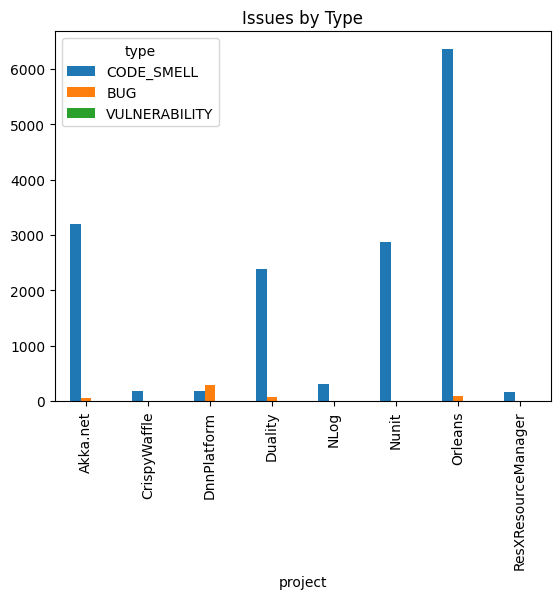

In [29]:
get_issue_property(issues_per_project, "type").plot.bar(title="Issues by Type")
plt.savefig('issues_plot.png')

In [41]:
get_issue_property(issues_per_project, "type").to_csv("type_issues.csv", sep="|")

Akka.net Index(['key', 'rule', 'severity', 'component', 'project', 'line', 'hash',
       'flows', 'status', 'message', 'effort', 'debt', 'author', 'tags',
       'creationDate', 'updateDate', 'type', 'externalRuleEngine', 'scope',
       'quickFixAvailable', 'messageFormattings', 'textRange.startLine',
       'textRange.endLine', 'textRange.startOffset', 'textRange.endOffset'],
      dtype='object')
CrispyWaffle Index(['key', 'rule', 'severity', 'component', 'project', 'line', 'hash',
       'flows', 'status', 'message', 'effort', 'debt', 'author', 'tags',
       'creationDate', 'updateDate', 'type', 'externalRuleEngine', 'scope',
       'quickFixAvailable', 'messageFormattings', 'textRange.startLine',
       'textRange.endLine', 'textRange.startOffset', 'textRange.endOffset'],
      dtype='object')
DnnPlatform Index(['key', 'rule', 'severity', 'component', 'project', 'line', 'hash',
       'flows', 'status', 'message', 'effort', 'debt', 'author', 'tags',
       'creationDate', 'updat

In [30]:
get_issue_property(issues_per_project, 'message').fillna(0).T.to_csv('issue_messages.csv', sep='|')

In [31]:
get_issue_property(issues_per_project, 'message').fillna(0).T.sort_values(by="NLog", ascending=False).to_csv('issue_messages_nlog_sorted.csv', sep='|')

<Axes: title={'center': 'Issues per Rule'}, xlabel='rule'>

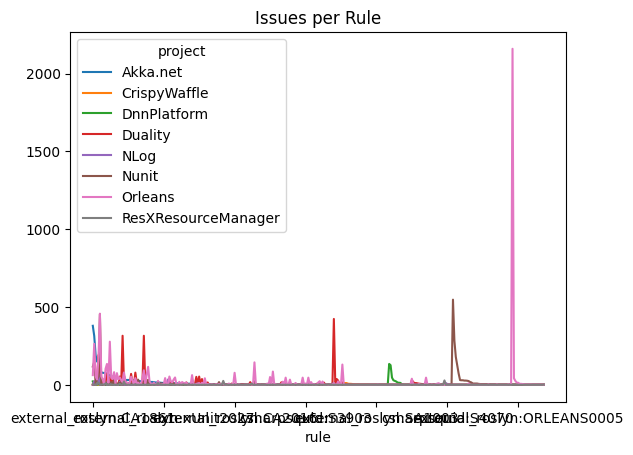

In [32]:
get_issue_property(issues_per_project, 'rule').fillna(0).T.plot(title="Issues per Rule")#.to_csv('issue_messages.csv', sep=';')

In [33]:
rules = get_issue_property(issues_per_project, 'rule').fillna(0).T
rules

project,Akka.net,CrispyWaffle,DnnPlatform,Duality,NLog,Nunit,Orleans,ResXResourceManager
rule,,,,,,,,
external_roslyn:CA1861,379.0,1.0,22.0,0.0,0.0,117.0,62.0,3.0
external_roslyn:CA1822,314.0,2.0,2.0,0.0,23.0,146.0,263.0,0.0
csharpsquid:S2436,189.0,0.0,0.0,1.0,0.0,6.0,53.0,0.0
csharpsquid:S1135,149.0,0.0,1.0,27.0,6.0,34.0,34.0,11.0
csharpsquid:S3776,145.0,0.0,4.0,191.0,70.0,52.0,176.0,14.0
...,...,...,...,...,...,...,...,...
csharpsquid:S3440,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
csharpsquid:S3966,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
secrets:S6338,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
#issues.groupby('rule')[['message', 'project']].first().reset_index().sort_values(by='rule')

Akka.net Index(['key', 'rule', 'severity', 'component', 'project', 'line', 'hash',
       'flows', 'status', 'message', 'effort', 'debt', 'author', 'tags',
       'creationDate', 'updateDate', 'type', 'externalRuleEngine', 'scope',
       'quickFixAvailable', 'messageFormattings', 'textRange.startLine',
       'textRange.endLine', 'textRange.startOffset', 'textRange.endOffset'],
      dtype='object')
CrispyWaffle Index(['key', 'rule', 'severity', 'component', 'project', 'line', 'hash',
       'flows', 'status', 'message', 'effort', 'debt', 'author', 'tags',
       'creationDate', 'updateDate', 'type', 'externalRuleEngine', 'scope',
       'quickFixAvailable', 'messageFormattings', 'textRange.startLine',
       'textRange.endLine', 'textRange.startOffset', 'textRange.endOffset'],
      dtype='object')
DnnPlatform Index(['key', 'rule', 'severity', 'component', 'project', 'line', 'hash',
       'flows', 'status', 'message', 'effort', 'debt', 'author', 'tags',
       'creationDate', 'updat

AttributeError: 'Axes' object has no attribute 'save'

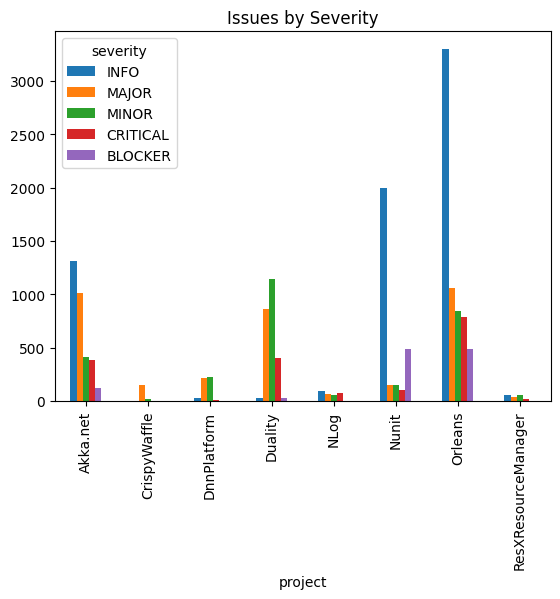

In [35]:
def get_issue_property(issues_per_project, property):
    severity = []
    for project, issues in issues_per_project.items():
        print(project, issues.columns)
        if property in issues:
            issues_severity = issues[property].value_counts()
            df_val_counts = pd.DataFrame(issues_severity).T
            df_val_counts['project'] = project
            df_val_counts.set_index('project', inplace=True)
            severity.append(df_val_counts)
    return pd.concat(severity)


get_issue_property(issues_per_project, 'severity').plot.bar(title="Issues by Severity").save

In [ ]:
def get_projectts_rules(issues_per_project, property):
    severity = []
    for project, issues in issues_per_project.items():
        if property in issues:
            df_val_counts = issues.groupby('rule')[['message', 'project']].first().reset_index().sort_values(by='rule')
            #df_val_counts.set_index('rule', inplace=True)
            severity.append(df_val_counts)
    return pd.concat(severity)


get_projectts_rules(issues_per_project, 'severity').pivot(index='rule', columns='project', values='message').fillna('')#.to_csv('rule_messages_by_project.csv', sep='|')

In [ ]:
get_projectts_rules(issues_per_project, 'type').to_csv('issues_by_type.csv', sep='|')

In [ ]:
def cumulative_sum(df, property):
    df = df.sort_values(by=property,ascending=False)
    df = df[df[property] != 0]
    df[f"{property}_cumsum"] = df[property].cumsum()/df[property].sum()*100
    return df

def get_head_percentil_row(df, percentil=20):
    n = len(df)
    ith = percentil*n//100
    return df.iloc[[ith]]

get_head_percentil_row(cumulative_sum(rules, 'Akka.net'), 20)


In [ ]:
def project_paretos(projects, rules, percentil):
    paretos = []
    for project in projects:
        rule_percentil = get_head_percentil_row(cumulative_sum(rules, project), percentil)
        paretos.append(rule_percentil)
    return pd.concat(paretos)
project_paretos(issues_per_project.keys(), rules, 20).fillna('')

In [ ]:
messages = get_projectts_rules(issues_per_project, 'severity').groupby('rule')[['message']].first().reset_index().sort_values(by='rule')

rules["total"] = rules[rules.columns].sum(axis=1)
rules.sort_values(by="total",ascending=False).head(10)

In [ ]:
messages[messages['rule'] == 'csharpsquid:S2699']
rules['rule']

In [ ]:
messages

In [ ]:
rules.sort_values(by='total').tail(10)

In [ ]:
get_head_percentil_row(cumulative_sum(rules, 'total'), 20)

In [ ]:
nlog[0]

In [ ]:
import requests
import json

def get_metrics():
    metrics = []
    token = 'c3F1XzkwMzRmMjQyM2U1YWVkMDY4N2FiYzg1YWQ2MDIxMzlmMGNkOTkzMGI6'
    headers = {
      'Authorization': f'Basic {token}'
    }
    for project in issues_per_project.keys():
        url = f'http://localhost:9000/api/measures/component_tree?component={project}&qualifiers=TRK&metricKeys=complexity_in_classes%2Clast_commit_date%2Cncloc%2Csqale_rating%2Calert_status%2Creliability_rating%2Csecurity_rating%2Cclasses'
        response = requests.get(url, headers=headers)
        metrics.append(response.json())
    return metrics
metricsss = get_metrics()

In [ ]:
for project, issues in issues_per_project.items():
        issues_severity = issues[property].value_counts()
        df_val_counts = pd.DataFrame(issues_severity).T
        df_val_counts['project'] = project
        df_val_counts.set_index('project', inplace=True)
        severity.append(df_val_counts)
    return pd.concat(severity)

In [ ]:
metricsss

In [ ]:
def parse(metric):
    df = pd.json_normalize(metric['baseComponent']['measures'])
    df['project'] = metric['baseComponent']['name']
    return df.pivot(index='project', columns='metric', values='value')

def parse_project_metrics(metrics):
    result = []
    for project in metrics:
        result.append(parse(project))
    return pd.concat(result)

parse_project_metrics(metricsss).sort_values(by='ncloc')


In [ ]:
rules

In [ ]:
# rules
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(rules.T)

In [ ]:
pd.DataFrame(cosine_sim).round(2)

In [38]:
def get_dataset(issues_per_project):
    severity = []
    for project, issues in issues_per_project.items():
        print(project, issues.columns)
        #issues_severity = issues[property]
        #df_val_counts = pd.DataFrame(issues_severity).T
        #df_val_counts['project'] = project
        #df_val_counts.set_index('project', inplace=True)
        severity.append(issues)
    return pd.concat(severity)

get_dataset(issues_per_project).to_csv("csharp_oss_sonar_issues_dataset.csv", sep="|")

Akka.net Index(['key', 'rule', 'severity', 'component', 'project', 'line', 'hash',
       'flows', 'status', 'message', 'effort', 'debt', 'author', 'tags',
       'creationDate', 'updateDate', 'type', 'externalRuleEngine', 'scope',
       'quickFixAvailable', 'messageFormattings', 'textRange.startLine',
       'textRange.endLine', 'textRange.startOffset', 'textRange.endOffset'],
      dtype='object')
CrispyWaffle Index(['key', 'rule', 'severity', 'component', 'project', 'line', 'hash',
       'flows', 'status', 'message', 'effort', 'debt', 'author', 'tags',
       'creationDate', 'updateDate', 'type', 'externalRuleEngine', 'scope',
       'quickFixAvailable', 'messageFormattings', 'textRange.startLine',
       'textRange.endLine', 'textRange.startOffset', 'textRange.endOffset'],
      dtype='object')
DnnPlatform Index(['key', 'rule', 'severity', 'component', 'project', 'line', 'hash',
       'flows', 'status', 'message', 'effort', 'debt', 'author', 'tags',
       'creationDate', 'updat